<a href="https://colab.research.google.com/github/ArriazaGonzalo/Prediccion_ventas_P1/blob/main/Predicciones_venta_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '/content/drive/MyDrive/Codificación de Dojo/Semana 1/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?

In [3]:
df.info()
#   Visto el output, el DataFrame (de ahora en adelante DF) tiene 8523 entradas (filas) y 12 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


2) ¿Cuáles son los tipos de datos en cada variable?

De la celda output anterior, se desprende que hay 4 columnas de números enteros (Item_Weight, Item_Visibility, Item_MRP e Item_Outlet_Sales); 1 de números enteros (Outlet_Establishment_Year); y 7 de objetos (Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type).

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [4]:
#   La siguiente función nos entrega la suma de filas duplicadas
df.duplicated().sum()
#   Visto el output, no hay filas duplicadas

0

4) Identifiquen los valores faltantes.

In [5]:
#   Con la siguiente función obtenemos la cantidad de datos faltantes en cada columna
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [6]:
#   Es posible que las columnas "Item_Identifier" e "Item_Weight" tengan relación, pues una indica "el Ítem" y la otra "su peso" 
# por lo que "achicaremos" el DF para observar su comportamiento.
dfItems = df.loc[:, ["Item_Identifier", "Item_Weight"]]
dfItems

,Item_Identifier,Item_Weight
0,FDA15,9.300
1,DRC01,5.920
2,FDN15,17.500
3,FDX07,19.200
4,NCD19,8.930
...,...,...
8518,FDF22,6.865
8519,FDS36,8.380
8520,NCJ29,10.600
8521,FDN46,7.210


In [7]:
#   Analizaremos si hay valores repetidos en ambas columnas
dfItems["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [8]:
#   A continuación crearemos un nuevo DF que contenga solo los valores faltantes en la columna Item_Weight. 
dfItemsNaN = df.loc[df['Item_Weight'].isna(), ["Item_Identifier", "Item_Weight"]]
dfItemsNaN

,Item_Identifier,Item_Weight
7,FDP10,NaN
18,DRI11,NaN
21,FDW12,NaN
23,FDC37,NaN
29,FDC14,NaN
...,...,...
8485,DRK37,NaN
8487,DRG13,NaN
8488,NCN14,NaN
8490,FDU44,NaN


In [9]:
#   Ya sabiendo que hay gran cantidad de valores nulos en Item_Weight, Buscaremos "producto por producto" para encontrar alguna 
# relación entre éstos y el  peso ("Item_Weight")
df1 = df.loc[df['Item_Identifier']=='FDP10', :]
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [10]:
df2 = df.loc[df['Item_Identifier']=='DRI11', :]
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,NaN,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676


In [11]:
df3 = df.loc[df['Item_Identifier']=='FDW12', :]
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
1788,FDW12,8.315,Regular,0.059541,Baking Goods,143.6444,OUT010,1998,NaN,Tier 3,Grocery Store,145.1444
2973,FDW12,8.315,reg,0.035627,Baking Goods,146.6444,OUT049,1999,Medium,Tier 1,Supermarket Type1,870.8664
5319,FDW12,8.315,Regular,0.035543,Baking Goods,143.3444,OUT013,1987,High,Tier 3,Supermarket Type1,1596.5884
6285,FDW12,8.315,Regular,0.035572,Baking Goods,144.4444,OUT046,1997,Small,Tier 1,Supermarket Type1,2902.8880
7004,FDW12,8.315,Regular,0.035644,Baking Goods,147.1444,OUT045,2002,NaN,Tier 2,Supermarket Type1,870.8664
7259,FDW12,8.315,Regular,0.035773,Baking Goods,144.3444,OUT017,2007,NaN,Tier 2,Supermarket Type1,3483.4656


In [12]:
#   Ya sabiendo que los productos que tienen más de una entrada tienen uno (o pocos) valores nulos, pero varias entradas en "Item_Weight", 
# se busca la manera de reemplazar los valores nulos. Luego de una extensa búsqueda, y de comparar códigos con compañeros de clase, 
# se hizo necesaria la búsqueda en internet. Revisando distintos códifos en StackOverflow y otros sitios similares,
# me ví en la necesidad de usar una IA para consultar el tema y fue así como ChatGPT me entregó la siguiente función.

df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform('first')

In [13]:
#   Aplicada la función, se cuentan nuevamente los NaN para asegurarnos de que la función se aplica correctamente.
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
#   Para corroborar que los valores NaN se reemplazaron por valores consistentes, se revisa algunos productos para comparar sus pesos.
df4 = df.loc[df['Item_Identifier']=='FDP10', :]
df4

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.0,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [15]:
df5 = df.loc[df['Item_Identifier']=='DRI11', :]
df5

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,8.26,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,8.26,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676


In [16]:
df6 = df.loc[df['Item_Identifier']=='FDW12', :]
df6

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
1788,FDW12,8.315,Regular,0.059541,Baking Goods,143.6444,OUT010,1998,NaN,Tier 3,Grocery Store,145.1444
2973,FDW12,8.315,reg,0.035627,Baking Goods,146.6444,OUT049,1999,Medium,Tier 1,Supermarket Type1,870.8664
5319,FDW12,8.315,Regular,0.035543,Baking Goods,143.3444,OUT013,1987,High,Tier 3,Supermarket Type1,1596.5884
6285,FDW12,8.315,Regular,0.035572,Baking Goods,144.4444,OUT046,1997,Small,Tier 1,Supermarket Type1,2902.8880
7004,FDW12,8.315,Regular,0.035644,Baking Goods,147.1444,OUT045,2002,NaN,Tier 2,Supermarket Type1,870.8664
7259,FDW12,8.315,Regular,0.035773,Baking Goods,144.3444,OUT017,2007,NaN,Tier 2,Supermarket Type1,3483.4656


In [17]:
#   Se corrobora que el llenado se realiza de manera correcta y buscamos qué valores de "Item_Identifier" son los que todavía 
# presentan valores NaN (presumiblemente son valores de "Item_Identifier" únicos).
dfItemsNaN = df.loc[df['Item_Weight'].isna(), ["Item_Identifier", "Item_Weight"]]
dfItemsNaN

,Item_Identifier,Item_Weight
927,FDN52,NaN
1922,FDK57,NaN
4187,FDE52,NaN
5022,FDQ60,NaN


In [18]:
#   Se eliminan estos valores pues se considera no aportarán información relevante, e incluso pueden inducir a error, durante el desarrollo del problema.
df.drop([927, 1922, 4187, 5022], inplace=True)

In [19]:
#   Buscamos nuevamente valores nuilos en la columna "Item_Weight", los que debiesen haber desaparecido
dfItemsNaN_2 = df.loc[df['Item_Weight'].isna(), ["Item_Identifier", "Item_Weight"]]
dfItemsNaN_2

,Item_Identifier,Item_Weight


In [20]:
#   Ya resuelto el problema de los valores nulos en "Item_Weight", procedemos a analizar los valores NaN de la columna "Outlet_Size". 
# Creamos un DF (sin las columnas relativas a "Item" pues se presume no aportan información para resolver los NaN analizados) para 
# observar relaciones con otras columnas.
dfOutletNaN = df.loc[df['Outlet_Size'].isna(),["Outlet_Identifier", "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Item_Outlet_Sales"]]
dfOutletNaN

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...
8502,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [21]:
#   Analizaremos si hay valores repetidos en las distintas columnas.
dfOutletNaN["Outlet_Identifier"].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [22]:
dfOutletNaN["Outlet_Location_Type"].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [23]:
dfOutletNaN["Outlet_Type"].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [24]:
#   En las columnas evaluadas, hay muchos valores repetidos. Analizaremos, en el DF original, si los valores de "Outlet_Identifier" 
# tienen relación con "Outlet_Size".
df_1 = df.loc[df["Outlet_Identifier"]=="OUT045", ["Outlet_Identifier", "Outlet_Size"]]
df_1

,Outlet_Identifier,Outlet_Size
8,OUT045,NaN
33,OUT045,NaN
46,OUT045,NaN
47,OUT045,NaN
56,OUT045,NaN
...,...,...
8483,OUT045,NaN
8502,OUT045,NaN
8508,OUT045,NaN
8514,OUT045,NaN


In [25]:
df_1["Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [26]:
df_2 = df.loc[df["Outlet_Identifier"]=="OUT017", ["Outlet_Identifier", "Outlet_Size"]]
df_2

,Outlet_Identifier,Outlet_Size
9,OUT017,NaN
25,OUT017,NaN
53,OUT017,NaN
54,OUT017,NaN
73,OUT017,NaN
...,...,...
8493,OUT017,NaN
8494,OUT017,NaN
8496,OUT017,NaN
8500,OUT017,NaN


In [27]:
df_2["Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [28]:
#   Se observa que TODOS los valores de "Outlet_Identifier" corresponden a valores nulos en la columna"Outlet_Size".
# Se buscará relación con otras columnas
df_3 = df.loc[df["Outlet_Identifier"]=="OUT045", ["Outlet_Identifier", "Outlet_Type"]]
df_3

,Outlet_Identifier,Outlet_Type
8,OUT045,Supermarket Type1
33,OUT045,Supermarket Type1
46,OUT045,Supermarket Type1
47,OUT045,Supermarket Type1
56,OUT045,Supermarket Type1
...,...,...
8483,OUT045,Supermarket Type1
8502,OUT045,Supermarket Type1
8508,OUT045,Supermarket Type1
8514,OUT045,Supermarket Type1


In [29]:
df_3["Outlet_Type"].value_counts()

Supermarket Type1    929
Name: Outlet_Type, dtype: int64

In [30]:
#   Sabemos que todos los valores "OUT045" corresponden a "Supermarket Type1" por lo que buscaremos en el DF original a qué valores 
# de "Outlet_Size" corresponden los "Supermarket Type 1".
df_4 = df.loc[df["Outlet_Type"]=="Supermarket Type1", ["Outlet_Type", "Outlet_Size"]]
df_4

,Outlet_Type,Outlet_Size
0,Supermarket Type1,Medium
2,Supermarket Type1,Medium
4,Supermarket Type1,High
6,Supermarket Type1,High
8,Supermarket Type1,NaN
...,...,...
8517,Supermarket Type1,Small
8518,Supermarket Type1,High
8519,Supermarket Type1,NaN
8520,Supermarket Type1,Small


In [31]:
#   No se encuentra una relación directa por lo que agregaremos la columna "Outlet_Location_Type" para evaluar si hay 
# alguna relación entre estas 3 columnas.
ST1 = df["Outlet_Type"]=="Supermarket Type1"
esnulo = df["Outlet_Size"].isna()
df_5 = df.loc[ST1 & esnulo, ["Outlet_Type", "Outlet_Location_Type", "Outlet_Size"]]
df_5

,Outlet_Type,Outlet_Location_Type,Outlet_Size
8,Supermarket Type1,Tier 2,NaN
9,Supermarket Type1,Tier 2,NaN
25,Supermarket Type1,Tier 2,NaN
33,Supermarket Type1,Tier 2,NaN
46,Supermarket Type1,Tier 2,NaN
...,...,...,...
8501,Supermarket Type1,Tier 2,NaN
8502,Supermarket Type1,Tier 2,NaN
8508,Supermarket Type1,Tier 2,NaN
8514,Supermarket Type1,Tier 2,NaN


In [32]:
#   Observado que todos los NaN de "Outlet_Size" corresponden a valores de "Outlet_Location_Type" = "Tier 2", se agruparán estos 
# últimos en el DF original para observar relaciones con el "Outlet_Size".
df_6 = df.loc[df["Outlet_Location_Type"]=="Tier 2", ["Outlet_Type", "Outlet_Location_Type", "Outlet_Size"]]
df_6

,Outlet_Type,Outlet_Location_Type,Outlet_Size
8,Supermarket Type1,Tier 2,NaN
9,Supermarket Type1,Tier 2,NaN
19,Supermarket Type1,Tier 2,Small
22,Supermarket Type1,Tier 2,Small
25,Supermarket Type1,Tier 2,NaN
...,...,...,...
8510,Supermarket Type1,Tier 2,Small
8513,Supermarket Type1,Tier 2,Small
8514,Supermarket Type1,Tier 2,NaN
8519,Supermarket Type1,Tier 2,NaN


In [33]:
#   Acotamos el DF anterior para asegurarnos de que todos los valores de "Tier 2" corresponden a valores "Small" (cuando no son NaN) en "Outlet_Size"
df_7 = df.loc[df["Outlet_Location_Type"]=="Tier 2", ["Outlet_Location_Type", "Outlet_Size"]]
df_7

,Outlet_Location_Type,Outlet_Size
8,Tier 2,NaN
9,Tier 2,NaN
19,Tier 2,Small
22,Tier 2,Small
25,Tier 2,NaN
...,...,...
8510,Tier 2,Small
8513,Tier 2,Small
8514,Tier 2,NaN
8519,Tier 2,NaN


In [34]:
df_7["Outlet_Size"].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

In [35]:
#   Se reemplazan, en el DF original (con los NaN de "Item_Weight" ya eliminados) los valores NaN de "Outlet_Size", que correspondan 
# a "Tier 2" en "Outlet_Location_type", por el str "Small".
# La función se encontró buscando en internet, específicamente en StackOverflow.
nulos = df['Outlet_Size'].isna()
mapping_dict = dict({'Tier 2': 'Small'})
df.loc[nulos, 'Outlet_Size'] = df.loc[nulos, 'Outlet_Location_Type'].map(mapping_dict)
df.isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [36]:
#   Corroboramos que ahora todos los valores de "Outlet_Size", asociados a "Tier 2", son "Small"
df_8 = df.loc[df["Outlet_Location_Type"]=="Tier 2", ["Outlet_Location_Type", "Outlet_Size"]]
df_8["Outlet_Size"].value_counts()

Small    2785
Name: Outlet_Size, dtype: int64

In [37]:
#   Buscaremos ahora los NaN que nos falta analizar/reemplazar.
dfOutletNaN2 = df.loc[df['Outlet_Size'].isna(),["Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Item_Outlet_Sales"]]
dfOutletNaN2

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,OUT010,NaN,Tier 3,Grocery Store,732.3800
28,OUT010,NaN,Tier 3,Grocery Store,178.4344
30,OUT010,NaN,Tier 3,Grocery Store,163.7868
45,OUT010,NaN,Tier 3,Grocery Store,358.2004
65,OUT010,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...
8400,OUT010,NaN,Tier 3,Grocery Store,425.4462
8432,OUT010,NaN,Tier 3,Grocery Store,159.7920
8473,OUT010,NaN,Tier 3,Grocery Store,431.4384
8486,OUT010,NaN,Tier 3,Grocery Store,45.2744


In [38]:
dfOutletNaN2["Outlet_Identifier"].value_counts()

OUT010    555
Name: Outlet_Identifier, dtype: int64

In [39]:
dfOutletNaN2["Outlet_Location_Type"].value_counts()

Tier 3    555
Name: Outlet_Location_Type, dtype: int64

In [40]:
dfOutletNaN2["Outlet_Type"].value_counts()

Grocery Store    555
Name: Outlet_Type, dtype: int64

In [41]:
#   Todos los valores NaN restantes corresponden al mismo "Outlet_Identifier", "Outlet_Location_Type" y "Outlet_Type". 
# Evaluaremos los "Tier 3", pues fue la columna que nos entregó la información en el caso anterior
df_9 = df.loc[df["Outlet_Location_Type"]=="Tier 3", ["Outlet_Location_Type", "Outlet_Size"]]
df_9

,Outlet_Location_Type,Outlet_Size
1,Tier 3,Medium
3,Tier 3,NaN
4,Tier 3,High
5,Tier 3,Medium
6,Tier 3,High
...,...,...
8512,Tier 3,High
8515,Tier 3,Medium
8516,Tier 3,Medium
8518,Tier 3,High


In [42]:
#   Agregaremos otras columnas pues el DF anterior no nos entrega la información necesaria.
df_10 = df.loc[df["Outlet_Location_Type"]=="Tier 3", ["Outlet_Identifier", "Outlet_Location_Type", "Outlet_Type", "Outlet_Size"]]
df_10

,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Outlet_Size
1,OUT018,Tier 3,Supermarket Type2,Medium
3,OUT010,Tier 3,Grocery Store,NaN
4,OUT013,Tier 3,Supermarket Type1,High
5,OUT018,Tier 3,Supermarket Type2,Medium
6,OUT013,Tier 3,Supermarket Type1,High
...,...,...,...,...
8512,OUT013,Tier 3,Supermarket Type1,High
8515,OUT018,Tier 3,Supermarket Type2,Medium
8516,OUT018,Tier 3,Supermarket Type2,Medium
8518,OUT013,Tier 3,Supermarket Type1,High


In [43]:
#   FIltramos los valores nulos en este DF de prueba
df_11 = df_10.loc[df_10["Outlet_Size"].isna(), :]
df_11

,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Outlet_Size
3,OUT010,Tier 3,Grocery Store,NaN
28,OUT010,Tier 3,Grocery Store,NaN
30,OUT010,Tier 3,Grocery Store,NaN
45,OUT010,Tier 3,Grocery Store,NaN
65,OUT010,Tier 3,Grocery Store,NaN
...,...,...,...,...
8400,OUT010,Tier 3,Grocery Store,NaN
8432,OUT010,Tier 3,Grocery Store,NaN
8473,OUT010,Tier 3,Grocery Store,NaN
8486,OUT010,Tier 3,Grocery Store,NaN


In [44]:
#   Sabiendo que todos los NaN son "Grocery Store", buscaremos en el DF ya reemplazado a qué "Outlet_Size" corresponde.
df_12 = df.loc[df["Outlet_Type"]=="Grocery Store", ["Outlet_Type", "Outlet_Size"]]
df_12

,Outlet_Type,Outlet_Size
3,Grocery Store,NaN
23,Grocery Store,Small
28,Grocery Store,NaN
29,Grocery Store,Small
30,Grocery Store,NaN
...,...,...
8473,Grocery Store,NaN
8480,Grocery Store,Small
8486,Grocery Store,NaN
8490,Grocery Store,Small


In [45]:
df_12["Outlet_Size"].value_counts()

Small    527
Name: Outlet_Size, dtype: int64

In [46]:
#   Confirmando que todos los NaN de la columna "Outlet_Size" corresponden a "Grocery Store" y, por lo tanto, "Outlet_Size" = "Small".
# Aplicamos la misma fórmula anterior
nulos = df['Outlet_Size'].isna()
mapping_dict = dict({'Grocery Store': 'Small'})
df.loc[nulos, 'Outlet_Size'] = df.loc[nulos, 'Outlet_Type'].map(mapping_dict)

6) Confirmen que no hay valores faltantes después de abordarlos.

In [47]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [48]:
#   Analizaremos las columnas categóricas "una a una".
df["Item_Fat_Content"].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [49]:
#   Es muy posible que en esta columna existan 2 categorías: "Low Fat" y "Regular". Sin embargo, encontramos otros valores asociados a éstas. 
# "LF y low fat" son presumiblemente "Low Fat" y reg es presumiblemente "Regular". 
# En un caso real, se consultaría al cliente, pero asumiremos esto y arreglaremos la columna.
df.replace({'Item_Fat_Content': {"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}}, inplace=True)

In [50]:
df["Item_Fat_Content"].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [51]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Semana 3
Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

1. Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


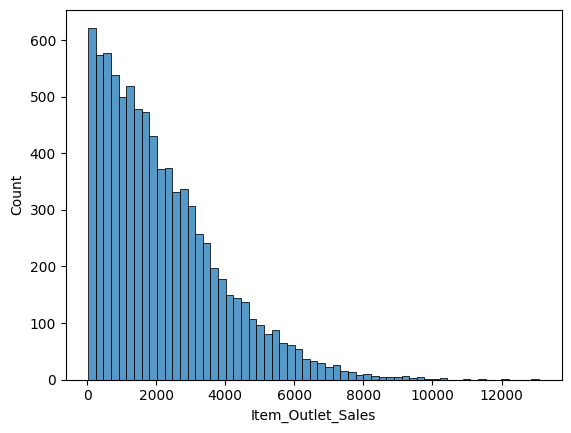

In [57]:
sns.histplot(data=df, x="Item_Outlet_Sales");

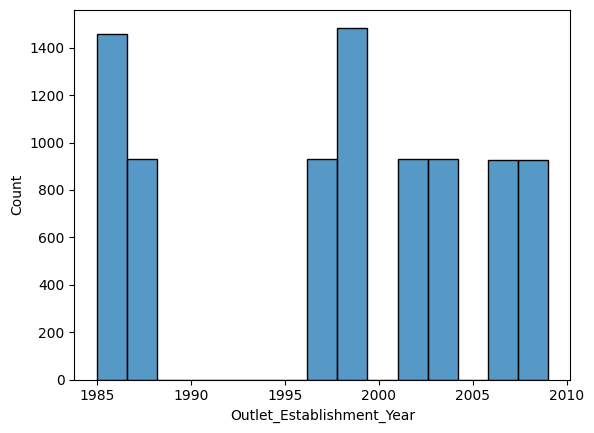

In [59]:
sns.histplot(data=df, x="Outlet_Establishment_Year");

2. Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

In [105]:
df["Outlet_Identifier"].value_counts()

OUT013    932
OUT027    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: Outlet_Identifier, dtype: int64

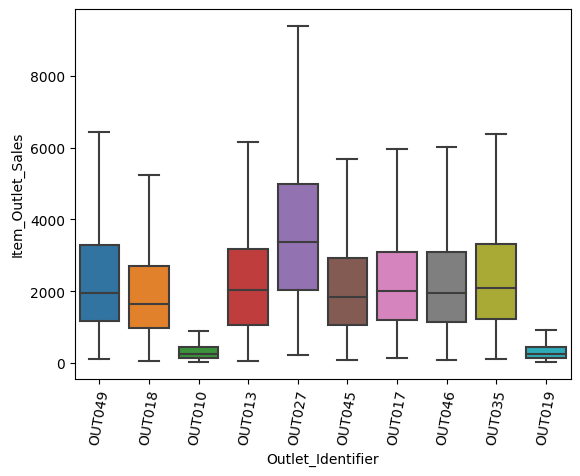

In [131]:
ax = sns.boxplot(data=df, x="Outlet_Identifier", y="Item_Outlet_Sales", showfliers=False, orient="v");
ax.set_xticklabels(ax.get_xticklabels(),rotation=80);

3. Mapa de calor de la correlación entre las características.
No duden en agregar más del mínimo. ¡Recuerden que esta es su oportunidad para mostrar sus habilidades!

In [132]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#Semana 4
El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.
Para la cuarta parte, la tarea es crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos. No duden en ser creativos esta semana. Esta es su oportunidad para distinguir sus proyectos de otros con visualizaciones y análisis.
• Aprovechen sus limpiezas, exploraciones y análisis anteriores.
• Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).
• Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.